#Предыдущие результаты, которые понадобятся в этом ноутбуке

In [7]:
import numpy as np  
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
np.random.seed(2)

Сгенерируем выборку

In [3]:
def linear_func(x):
    target_k = 2
    target_b = 9
    return target_k * x + target_b

In [4]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[ 9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11. ]


In [6]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[ 8.95832422  9.19437332  9.18638039  9.76402708  9.62065644  9.91582526
 10.25028814 10.27547119 10.49420478 10.70909924 11.0551454 ]


In [12]:
model = LinearRegression().fit(xes.reshape(-1, 1), noisy_target_ys)

================================================================================
# Начало скринкаста 4
================================================================================

Own linear regression with gradient descent

In [8]:
def MSE_loss(target, predict):
    return ((target - predict)**2).mean()

In [13]:
MSE_loss(target_ys, model.predict(xes.reshape(-1, 1)))

0.0027556019276602675

In [14]:
class OwnLinearRegressionGD:
    def __init__(self, k=1, b=1):
        self.lr = 0.03 
        self.n_iter = 1500
        self.coef_ = None
        self.intercept_ = None
        self.W = np.array([b, k])

    def calc_loss(self, X, Y):
        X_full = np.c_[np.ones(X.shape[0]), X]
        return MSE_loss(Y, X_full @ self.W)

    def calc_grad(self, X, Y):
        return 2 / X.shape[0] * (X.T @ ((X @ self.W) - Y))

    def predict(self, X):
        X_full = np.c_[np.ones(X.shape[0]), X]
        return X_full @ self.W

    def fit(self, X, Y):
        X_full = np.c_[np.ones(X.shape[0]), X]
        self.W = np.random.rand((X_full.shape[1]))
        for _ in range(self.n_iter):
            self.W = self.W - self.lr * self.calc_grad(X_full, Y)
        self.coef_ = self.W[1:]
        self.intercept_ = self.W[:1]
        print(self.coef_, self.intercept_)
        



In [15]:
lin_reg = OwnLinearRegressionGD(1, 1)

print("Predict = ",lin_reg.predict(np.array([2])))
X = xes.reshape((-1, 1))
lin_reg.fit(X, noisy_target_ys)

print("Predict = ",lin_reg.predict(np.array([2])))

print(lin_reg.calc_loss(X, noisy_target_ys))


Predict =  [3.]
[2.01291931] [8.94106844]
Predict =  [12.96690705]
0.011252953312742876


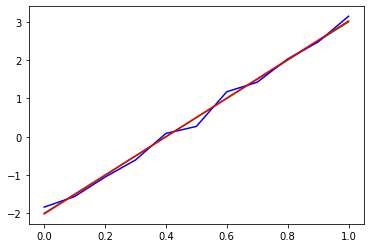

In [ ]:
GDRegression_predict = [lin_reg.predict(np.array([x]))[0] for x in xes]
sns.lineplot(x = xes, y = target_ys, color = "g")
sns.lineplot(x = xes, y = noisy_target_ys, color = "b")
sns.lineplot(x = xes, y = GDRegression_predict, color = "r")

In [17]:
model.predict(np.array([[5]])), lin_reg.predict(np.array([[5]]))

(array([18.9963007]), array([19.00566497]))

================================================================================
# Конец скринкаста 4
================================================================================